<a href="https://colab.research.google.com/github/polina-minaeva/decision-tree/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построение регрессии и дерева решений для предсказания средней ценности дома MedHouseVal на основе данных о недвижимости в Калифорнии

1. Загрузка данных

In [ ]:
#1) Импортировала пандас для создания датафрейма

import pandas as pd

In [ ]:
#2) Импортировала датасет с недвижимостью Калифорнии из sklearn

from sklearn.datasets import fetch_california_housing

In [ ]:
calif = fetch_california_housing()

In [ ]:
print(calif.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
calif.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
#3) Создала датафрейм из импортированного датасета
calif_homes = pd.DataFrame(calif.data, columns=calif.feature_names)
calif_homes_tagr = calif.target

In [ ]:
calif_homes.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


2. Первичный анализ данных

In [ ]:
#4) Проверила данные на наличие пропусков

calif_homes.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
#5) Нормализовала один из признаков

from sklearn import preprocessing

ser_rooms = calif_homes['AveRooms']

In [ ]:
#norm_arr = preprocessing.normalize([ser_rooms])

In [ ]:
rom_array = np.array(ser_rooms)

In [ ]:
rom_array.shape

(20640,)

In [ ]:
norm_arr = preprocessing.normalize([rom_array])

In [ ]:
print(norm_arr)

[[0.00814819 0.00727786 0.00966954 ... 0.00607316 0.0062178  0.00613053]]


In [ ]:
print(norm_arr[0])

[0.00814819 0.00727786 0.00966954 ... 0.00607316 0.0062178  0.00613053]


In [ ]:
#norm_arr = norm_arr[0].reshape(1, 20640)

In [ ]:
#norm_arr

array([[0.00814819, 0.00727786, 0.00966954, ..., 0.00607316, 0.0062178 ,
        0.00613053]])

In [ ]:
#norm_arr.tolist()

In [ ]:
calif_homes['NormalAveRooms'] = norm_arr[0]

In [ ]:
calif_homes.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,NormalAveRooms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.008148
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.007278
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.009670
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.006787
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.007329


In [ ]:
del calif_homes['AveRooms']

In [ ]:
calif_homes.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,NormalAveRooms
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23,0.008148
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22,0.007278
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,0.009670
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,0.006787
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,0.007329


3. Разделение выборки на обучающее и тестовое подмножества

In [ ]:
#5) Разделила выборку на трейн и тест

X = calif_homes
y = calif_homes_tagr

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Обучение модели регресси на обучающем подмножестве

In [ ]:
#6) Запустила модель линейной регрессии

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
model.score(X_test, y_test)

0.5757877060324508

5. Обучение дерева решений на обучающем подмножестве

In [ ]:
#7) Построила дерево решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model2 = DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
y_pred = model2.predict(X_test)
y_pred

array([1.62006299, 1.16133679, 2.73565309, ..., 4.57673829, 1.16133679,
       1.86688424])

In [ ]:
model2.score(X_test, y_test)

0.5096717098996051

In [ ]:
#8) Визуализировала дерево решений

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_vis = model2.fit(X_train, y_train)

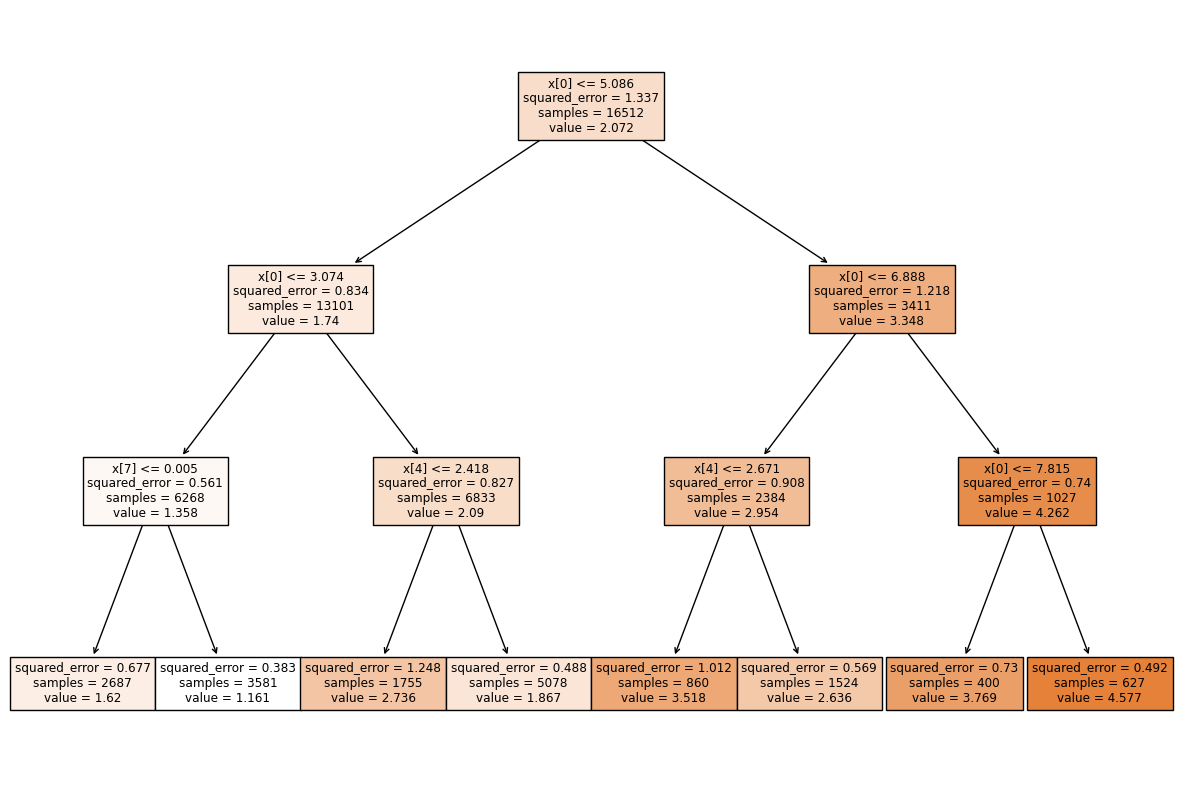

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(for_vis, filled=True);

6. Оптимизация параметра max_depth дерева решений

In [ ]:
#9) Построила цикл для определения наиболее подходящего параметра в дереве решений

In [ ]:
list_depth = [1,2,3,4,5,6,7]

In [ ]:
dt_regs = {}

for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=42).fit(X_train, y_train)

In [ ]:
dt_regs

{'depth=1': DecisionTreeRegressor(max_depth=1, random_state=42),
 'depth=2': DecisionTreeRegressor(max_depth=2, random_state=42),
 'depth=3': DecisionTreeRegressor(max_depth=3, random_state=42),
 'depth=4': DecisionTreeRegressor(max_depth=4, random_state=42),
 'depth=5': DecisionTreeRegressor(max_depth=5, random_state=42),
 'depth=6': DecisionTreeRegressor(max_depth=6, random_state=42),
 'depth=7': DecisionTreeRegressor(max_depth=7, random_state=42)}

In [ ]:
dt_regs.items()

dict_items([('depth=1', DecisionTreeRegressor(max_depth=1, random_state=42)), ('depth=2', DecisionTreeRegressor(max_depth=2, random_state=42)), ('depth=3', DecisionTreeRegressor(max_depth=3, random_state=42)), ('depth=4', DecisionTreeRegressor(max_depth=4, random_state=42)), ('depth=5', DecisionTreeRegressor(max_depth=5, random_state=42)), ('depth=6', DecisionTreeRegressor(max_depth=6, random_state=42)), ('depth=7', DecisionTreeRegressor(max_depth=7, random_state=42))])

In [ ]:
pred_list = {}

for dep, des_tr in dt_regs.items():
      pred_list[dep] = des_tr.predict(X_test)
      print(dep, des_tr.score(X_test, y_test))

depth=1 0.2795112163463813
depth=2 0.4244060273337802
depth=3 0.5096717098996051
depth=4 0.5538911746846257
depth=5 0.5992475794815433
depth=6 0.6199850773347328
depth=7 0.650015670933976


Лучший результат показал вариант с глубиной depth=7

Как итог, сравнивая точность моделей линейной регрессии и дерева решений, точность линейной регрессии оказалась выше. Такая модель больше подходит для решения задач с множеством непрерывных значений, она проще в исполнении